Name : **Balaji Subramani**  
Matrikel-Nr : **798924**

## Fire in the nature park

***Problem Summary***

The administration of the nature park Montesinho in north-east Portugal wants to predict wild fires based on wheather data of the Fire-Wheather-Index (FWI). The aim is to recognize the affected area and consequently the intensity of the imminent wild fire as early as possible in order to be able to adequatly assess the danger caused by the fire. To this aim, data from 517 wild fires have been collected. The features are summarized below

***Features***

- X (X-coordinate of the fire in the park: 1 to 9)
- Y (Y-coordinate of the fire in the park: 2 to 9)
- Month month: ”jan“ to ”dec“)
- day (day: ”mon“ bis ”sun“)
- FFMC (FFMC index of the FWI system: 18.7 to 96.2)
- DMC (DMC index of the FWI system: 1.1 bis 291.3)
- DC (DC index of the system: 7.9 bis 860.6)
- ISI (ISI index of the FWI systems: 0.0 to 56.1)
- temp (temperature in degrees Celsius: 2.2 to 33.3)
- RH (relative humidity in %: 15 to 100)
- wind (wind velocity in km/h: 0.4 to 9.4)
- rain (rainfall in mm/m2: 0.0 to 6.4)
- **area (forest area that has been burnt in hectare: 0.09 to 1090.84)**

***Goal***

Predict **area** that has been burnt in hectare

Load the data into Python and preprocess them appropriately; perform an adequate normalization of the features. For example, he label area is distributed very non-uniformly such that a transformation such as area = log(1 + area) is appropriate. Identify and implement a suitable learning method in Python. Train and evaluate the model. Propose a trivial baseline model with which you can compare your model’s performance. Provide the RMSE (root mean square error) of your model and the baseline model obtained with 10-fold cross-validation. Provide a short documentation and motivation of each of your steps.



In [131]:
import datetime

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [132]:
#### Importing the file ####
Path="C:\\Users\\Dell\\Documents\\Python Scripts\ML\\ML Project\\"
Filename='fires.csv'
Data=pd.read_csv(Filename)

## Data Analysis

In [133]:
#### Sample data from data ###
Data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [134]:
#### Features from data ###
Data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [135]:
#### Information from dataset ###
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


#### Inference :

- There are 12 independent columns for area
- There is no **null** values in data
- X,Y, month, day columns are **categorical values**

In [136]:
Data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


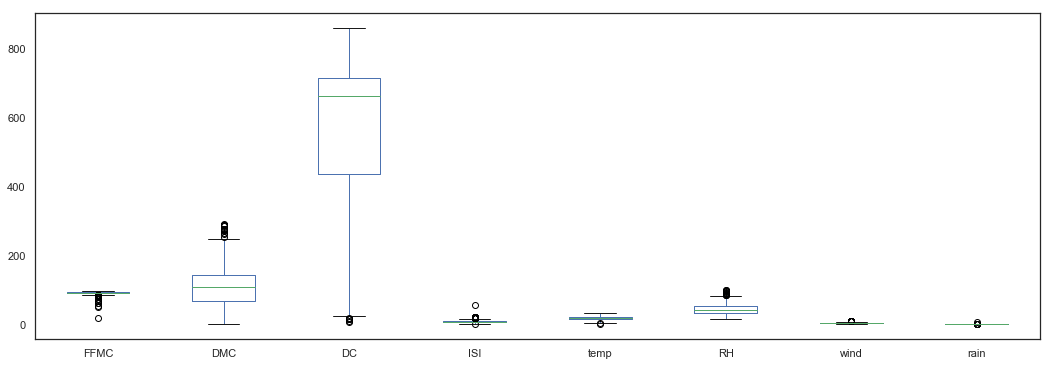

In [137]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
Data[ncols].plot(kind="box", figsize=(18,6))

### Findings from description

- FMCC is mostly between of **90 to 96**. But the minimum is 18. So there are a couple of ***outliers*** in this.
- Same scenario for Rain feature

In [138]:
## Storing Area for future comparision purpose
Data["Orgarea"]=Data["area"]

## Nature Park Map & Affected place

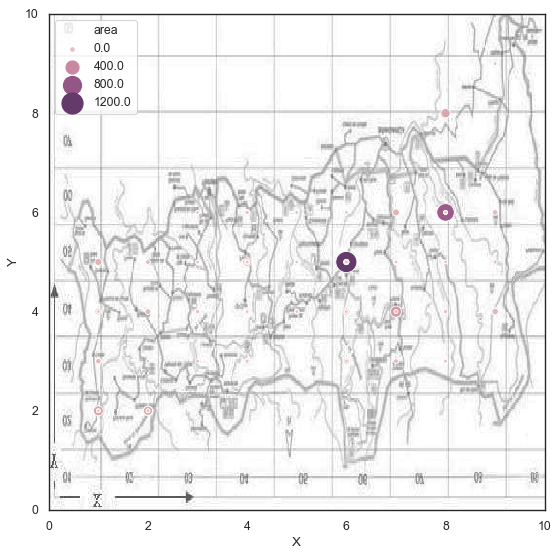

In [139]:
## Comparing the Fire affected location based on available Map from internet##
## Source of Image : https://www.researchgate.net/figure/The-map-of-the-Montesinho-natural-park_fig1_238767143

import matplotlib.image as mpimg
import seaborn as sns

from matplotlib.pyplot import figure
figure(num=None, figsize=(8,16), dpi=80, facecolor='w', edgecolor='k')

map_img = mpimg.imread('images\map.png') 
plt.imshow(map_img, zorder=0, extent=[0, 10, 0, 10])
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x='X', y='Y',size='area', hue='area', data=Data,sizes=(10, 360),palette=cmap)
plt.show()

### Findings from map plot

- Area **(6,5) & (8,6)** is the most affected place and other places are affected very less. So dependent variable data is skewed in left side.


### Encoding the categorical columns (Day, Month, X and Y)

Since we are going to apply the linear algorithm, categorical features need to encode into **Numeric feature**. So we used get_dummy panda package which helps to change it numeric features. Further more, We can get the all information from each category column with `N-1` category values. So we eliminated friday (For day feature), Decemeber (For month feature). 

In [140]:
#### Function for Renaming day columns for Encoding ####

def renames(feature='day', nbr=12):
    Dict_cols={}
    for i in range(nbr):
        Dict_cols[i]=feature+str(i)
    return Dict_cols
    

In [141]:
#### Encoding the categorical columns 

dummies= pd.get_dummies(Data['day'])
Encoded_Data=Data.join(dummies)

dummies= pd.get_dummies(Data['month'])
Encoded_Data=Encoded_Data.join(dummies)

dummies= pd.get_dummies(Data['X'])
Encoded_Data=Encoded_Data.join(dummies)
Encoded_Data=Encoded_Data.rename(index=str, columns=renames('X_',Data['X'].max()+1))

dummies= pd.get_dummies(Data['Y'])
dummies=dummies.rename(index=str, columns=renames('Y_',Data['Y'].max()+1))
Encoded_Data=Encoded_Data.join(dummies)

## Droping the old columns and Extra catergorical value field (Degree of freedom from categorical values : n-1)
Encoded_Data=Encoded_Data.drop(columns=['day','month','X','Y','fri', 'dec'])

Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2','X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4','Y_5', 'Y_6', 'Y_8', 'Y_9']

### Correlation Study

Correlation study helps to find the dependence between each independent feature. If there is a correlation between the independent feature, it may lead to **Multicollinearity problem**.

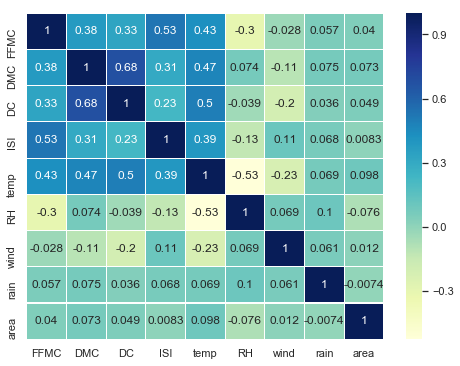

In [142]:
## Checking the independence between the X features

ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain', 'area']
cm = np.corrcoef(Data[ncols].values.T) 
f, ax = plt.subplots(figsize =(8, 6)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

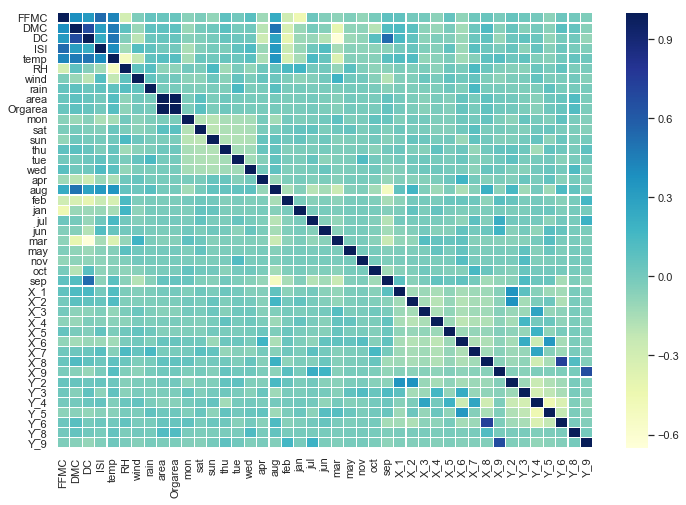

In [143]:
ncols=Encoded_Data.columns
cm = np.corrcoef(Encoded_Data.values.T) 
f, ax = plt.subplots(figsize =(12, 8)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=False,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

#### Understanding from Correlation

- All independent columns are not dependent. 

### Finding the pattens

The motivation of this analyze the distribution of the data and correlation between the features

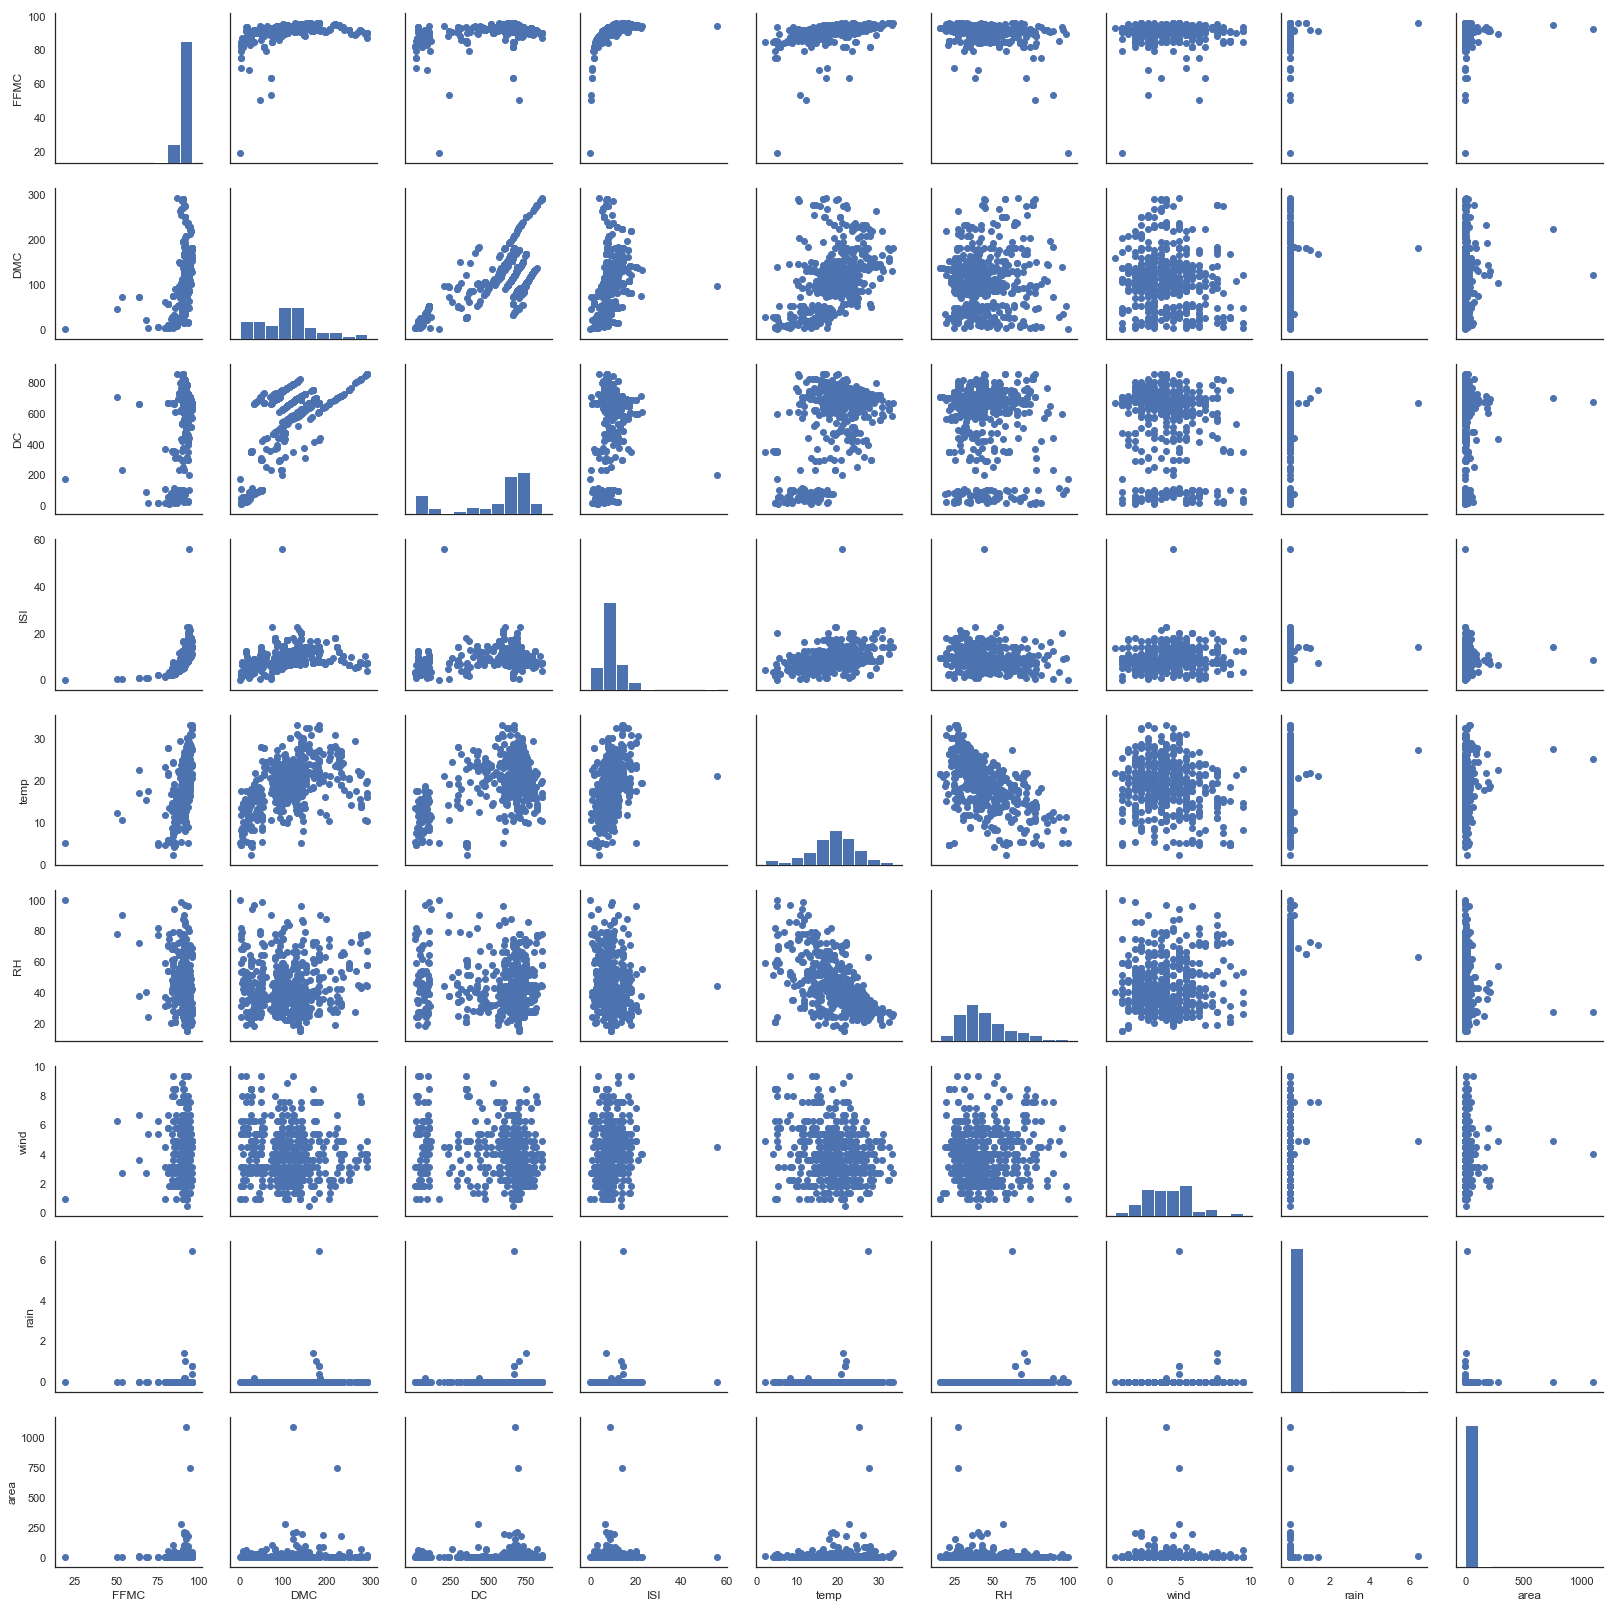

In [144]:
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain',"area"]
sns.set(style="white")

g = sns.PairGrid(Data[ncols])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

### Findings :

- *`Rain` & `FFMC` Feature* - Bar graph shows only one bin as there are couple of **outliers**
- `DMC` & `DC` are having same pattern also, we have 68% of correlation. If we have business team , we could discuess and dicide to over with this feature (Create new feature from this 2 metric and or remove one)

## Data Preprocessing

### log transformation & Bounding the Dependent variable

The log transformation is, the most popular among the different types of transformations used to transform **skewed data to approximately conform to normality**.

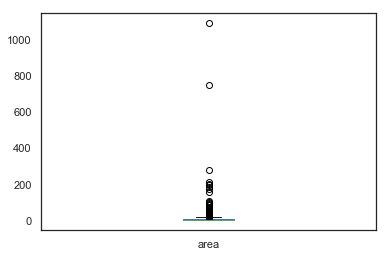

In [145]:
## Box plot
Data["area"].plot(kind='box')

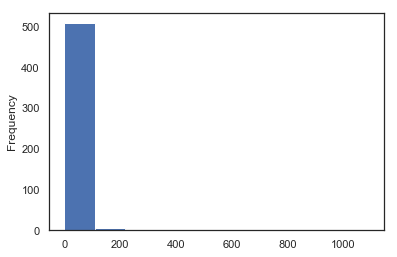

In [146]:
# Fired area in histogram
Data["area"].plot(kind='hist', bins=10)

In [147]:
# Applying Log Transformation
Data["area"]=[ 0 if np.isinf(x) else x for x in (Data["area"]+1).apply(np.log) ]
Encoded_Data["area"]=[ 0 if np.isinf(x) else x for x in (Encoded_Data["area"]+1).apply(np.log) ]

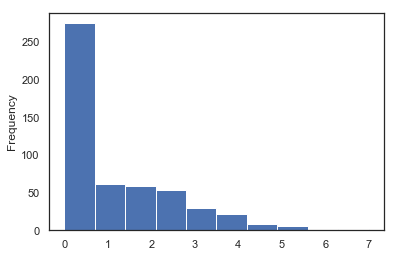

In [148]:
## After log applied
Data["area"].plot(kind='hist', bins=10)

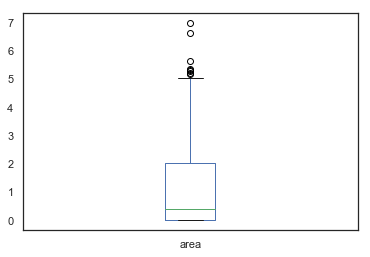

In [149]:
Data["area"].plot(kind='box')

Still, we see some outliers independent variable. It could affect the model building as we have different behavior. Here, **More than 50 percentile of area's are not burned. So it is skewed towards 0**. 

Hence I tried to change the set upper `85th percentile` which is average of 2.5. But it didn't make any difference with results. So reverted back the changes.


In [150]:
## Setting upper bound to 85 percentile data as we could not find the common behavour from that.
thersold=.85
print(str(thersold)+" percentile of area (log transformed) is "+str(Data["area"].quantile(thersold)))
print(str(thersold)+" percentile of area is "+str(Data["Orgarea"].quantile(thersold)))

#### Uncomment below code to set the upper bound to the thersold

# Data["area"][Data["area"] > Data["area"].quantile(thersold)]=Data["area"].quantile(thersold)
# Encoded_Data["area"][Encoded_Data["area"] > Encoded_Data["area"].quantile(thersold)]=Encoded_Data["area"].quantile(thersold)

0.85 percentile of area (log transformed) is 2.5762652095274587
0.85 percentile of area is 12.147999999999996


In [151]:
##After setting the upper bound
# Data["area"].plot(kind='hist', bins=10)

In [152]:
# Data["area"].plot(kind='box')

## Outlier detection & handling for independent variables

Input data are not normalized often. So we see outliers. Also, data are on a different scale. So it is better to do normalize the data. So we are using the `ZScore` for finding the outliers. Then transform the outliers which are more than 3 to `median` value


In [153]:
allcols=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']
ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain']

ztrans_data=Data[['X', 'Y', 'month', 'day']]
col_zscores=[]

for col in ncols:
    col_zscore = col + '_zscore'
    ztrans_data[col_zscore] = (Data[col] - Data[col].mean())/Data[col].std(ddof=0)
    col_zscores.append(col_zscore)

In [154]:
## Outliers information in each feature
for col in ncols:
    print(col+ ' column has  '+str(len(Data[np.abs(ztrans_data[col+"_zscore"])>3][col]))+" outliers")
    Data[np.abs(ztrans_data[col+"_zscore"])>3][col]=Data[col].median()

FFMC column has  7 outliers
DMC column has  0 outliers
DC column has  0 outliers
ISI column has  2 outliers
temp column has  0 outliers
RH column has  5 outliers
wind column has  4 outliers
rain column has  3 outliers


### One more data anlaysis

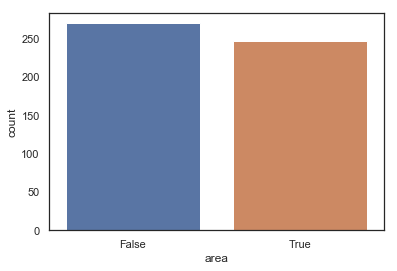

In [155]:
## Checking the burned and not burned area

sns.countplot(pd.DataFrame(Data["area"]==0)['area'])

From above graph, we are able to see that around 247 areas burned is 0 and all others are having non-zero values. So the result may skew towards 0, Especially in Decision Tree algorithm. 

## Logistic Regression - Burned or Not

So I planned to produce one more feature that helps to identify whether it is **burned or not** with available input data. here we experimented with SVM & Logistics Regression

In [156]:
## Standardzing the input variables

def StandardScalerData(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [157]:
## For Hyper parameter selection used Grid Search

def param_selection(model,param_grid, X_train, y_train, nfolds=10):
#     print(str(datetime.datetime.now())+" : Starting Param selection")
    grid_search = GridSearchCV(model, param_grid, cv=nfolds,verbose =1)
#     grid_search = GridSearchCVProgressBar(model, param_grid, cv=nfolds) 
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
#     print(str(datetime.datetime.now())+" : Param selection is completed")
    return grid_search

In [158]:
## Creating a categorical output feature

Data['burned']=1
Data['burned'][Data["area"]==0]=0

Encoded_Data['burned']=1
Encoded_Data['burned'][Encoded_Data["area"]==0]=0

Data['burned'].value_counts()

1    270
0    247
Name: burned, dtype: int64

In [159]:
Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2','X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4','Y_5', 'Y_6', 'Y_8', 'Y_9']
std_cols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [160]:
## Apply the standard scaling for numeric features
Standarized_Data=Encoded_Data
Standarized_Data[std_cols]=StandardScalerData(Encoded_Data[std_cols])

In [161]:
## Splitting the train & test data
X_train, X_test, y_train, y_test = train_test_split(Standarized_Data[Encod_ncols], Standarized_Data['burned'],  test_size=0.2, random_state=0)

In [162]:
## Applying logistic regression with different parameters
## C - Margin : smaller values specify stronger regularization

LGR_grid_result=param_selection(linear_model.LogisticRegression(),{'penalty':['l1', 'l2'],'C':[0.00001, 0.0001, 0.001,0.01,0.5,1,10,100]}, X_train, y_train,10)
LGR_grid_result.best_estimator_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 1, 'penalty': 'l2'}


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    2.1s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

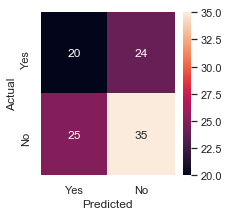

Means Cross Validation Accuracy Score :0.6830524203493218
Precision : From the Prediction of burned, 74.0% values are predicted correctly
Recall : From overall burned, 71.0% values are predicted correctly
AUC : 65.0%


In [163]:
# Reproducing the model from best estimator result
modelLG=LogisticRegression(C=1, penalty='l2')
modelLG.fit(X_train, y_train)

# Validating the model
y_pred = modelLG.predict(X_test)
y_train_pred=modelLG.predict(X_train)

## Confusion Matrix 
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## K Fold Validation with 10 Folds
scores = cross_val_score(modelLG, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="accuracy")
scores=np.sqrt(scores)

print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
print('Precision : From the Prediction of burned, '+str(round(np.mean(np.sqrt(cross_val_score(modelLG, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="recall"))),2)*100)+'% values are predicted correctly')
print('Recall : From overall burned, '+str(round(np.mean(np.sqrt(cross_val_score(modelLG, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="precision"))),2)*100)+'% values are predicted correctly')
print('AUC : '+str(round(np.mean(np.sqrt(cross_val_score(modelLG, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="roc_auc"))),2)*100)+'%')


#### Connection with validation metric


- **TP (True Positive)** - Predicted & Actuals are Burned
- **TN (True Negative)** - Predicted & Actuals are *not Burned*
- **FP (False Positive)** - Predicted is Burned but acutal is not Burned
- **FN (False Negative)** - Predicted is not Burned but acutal is Burned


**Accuracy** = `(TP + TN) / (TP + TN + FP + FN)`  *(Overall Accuracy for prediction)*

**Precision** = `TP / (TP + FP)`

*(Predicted & Actuals are Burned) / (Predicted & Actuals are Burned) + (Predicted is Burned but acutal is not Burned)*

- From the prediction of positive, how many are correct ?

**Recall** = `TP / (TP + FN)`

*(Predicted & Actuals are Burned) / (Predicted & Actuals are Burned) + (Predicted is not Burned but acutal is Burned)*

- From overall burned, how many are predicted correctly ?


In [164]:
## Applying SVM with different parameters
SVC_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,50,100,150], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10,100], 'kernel':['poly','rbf']}
SVC_grid_result=param_selection(SVC(),SVC_param_grid, X_train, y_train,5)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:   12.6s finished


In [165]:
SVC_grid_result.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

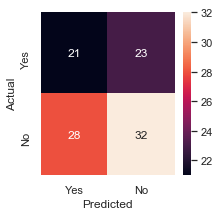

Means Cross Validation Accuracy Score :0.655745183965551
Precision : From the Prediction of burned, 71.0% values are predicted correctly
Recall : From overall burned, 68.0% values are predicted correctly
AUC : 64.0%


In [167]:
# Reproducing the model from best estimator result
modelSVC=SVC(C=10,  gamma=0.1, kernel='rbf')
modelSVC.fit(X_train, y_train)

## Validation
y_pred = modelSVC.predict(X_test)
y_train_pred=modelSVC.predict(X_train)

## Confusion Matrix 
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## K Fold Validation with 10 Folds
scores = cross_val_score(modelSVC, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="accuracy")
scores=np.sqrt(scores)
print("Means Cross Validation Accuracy Score :"+str(np.mean(scores)))
print('Precision : From the Prediction of burned, '+str(round(np.mean(np.sqrt(cross_val_score(modelSVC, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="recall"))),2)*100)+'% values are predicted correctly')
print('Recall : From overall burned, '+str(round(np.mean(np.sqrt(cross_val_score(modelSVC, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="precision"))),2)*100)+'% values are predicted correctly')
print('AUC : '+str(round(np.mean(np.sqrt(cross_val_score(modelSVC, Standarized_Data[Encod_ncols], Standarized_Data['burned'], cv=10, scoring="roc_auc"))),2)*100)+'%')


### Model selection 
-  From above 2 models, Logistic is better with not only **accuracy** metric, but also with **precision & recall**.
-  So using the *Logistic model* to predict whether the area is burned or not in further work.


In [169]:
Standarized_Data['BurnedPred']=modelLG.predict(Standarized_Data[Encod_ncols])

## Model Evaluation Methdology

As part of each model, we experiment the below parameters,

- Finding Coeffcients if it is linear model (Modeltype =1)
- Finding important features if it is Random Forest model (Modeltype =2)
- 10 Fold validation for RMSE and presenting results (Both predicted and exponential transformed)
- Experiment with BurnedPred feature
    - As part of this experiment, we mulitiply `BurnedPred` with `Predicted Area Value`. As a result if it can make 0 even it is leading with errors for **not burned areas**.

In [218]:
## Common Function for validations - validate Train and Test data metrics, Cross Validation, Overall Validation

def Validations(model,X_col, Data,Modeltype=0):
    y_col="area"
    
    
    plt.subplots(figsize=(8,8))
    
    if Modeltype==1:
        ## coefficients of features: Only for linear algorithm
        plt.subplot(2,2,1)
        coefs=pd.DataFrame({'Featrures':X_col, 'Coeff':model.coef_})
        ## Accounting both positive & negative important coefficients
        coefs=pd.concat([coefs.sort_values(by=['Coeff'],ascending=False).head(5),coefs.sort_values(by=['Coeff'],ascending=False).tail(5)])
#         print("Top & Bottom 5 Features of Coeff's")
#         print("_______________________________")
#         print(coefs)
        
        plt.bar(coefs['Featrures'], coefs['Coeff'])
        plt.xticks(rotation=70)
        plt.title('Top & Bottom 5 Features of Coeff''s ')
    
    elif Modeltype==2:
        ## To display the important features : Only for Random Forest algorithm
        plt.subplot(2,2,1)
        coefs=pd.DataFrame({'Featrures':X_col, 'Coeff':model.feature_importances_})
        coefs=coefs.sort_values(by=['Coeff'],ascending=False).head(10)
#         print("Top 10 Features of Coeff's")
#         print("_______________________________")
#         print(coefs)
        plt.bar(coefs['Featrures'], coefs['Coeff'])
        plt.xticks(rotation=70)
        plt.title('Top 10 important Features ')
 
    ## K Fold Validation
    scores = cross_val_score(model, Data[X_col], Data[y_col], cv=10, scoring="neg_mean_squared_error")
    scores=np.sqrt(abs(scores))
    
    ## Plotting the result of K Fold Validation
    plt.subplot(2,2,2)
    pd.Series(np.sqrt(scores)).plot(kind="box", label="RMSE");
    plt.title('RMSE from 10 Folds')
    
    print(" ")
    print("10 Fold validation :")
    print("_______________________________")
    print("Cross Validation RMSE Scores "+str(scores))
    print("Cross Validation RMSE Mean Score "+str(np.mean(scores, dtype=np.float64)))
    
    ## RMSE of Orginal Area
    print("Cross Validation RMSE Mean Score Orginial Burned Area Value "+str(np.exp(np.mean(scores, dtype=np.float64))-1))
    
    ## Multiplying the BurnedPred Feature with Predicted value
    print(" ")
    print("With effect of Burned Categorical Feature  ")
    print("_______________________________")
    O_Data_pred=model.predict(Data[X_col])
    Data_pred=O_Data_pred*Data['BurnedPred']
    
    print("RMSE of Log Transformed Area : "+str(np.sqrt(mean_squared_error(np.log(Data['Orgarea']+1), Data_pred))))
    ## RMSE of Orginal Area
    print("RMSE of Orginal Area : "+str(np.exp(np.sqrt(mean_squared_error(np.log(Data['Orgarea']+1), Data_pred)))-1))
    print(" ")
    
     ## Ploting the Prediction & Actual whole data in scatter plot - with burned feature
    plt.subplot(2,2,3)
    plt.scatter(np.log(Data['Orgarea']+1),O_Data_pred)
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.title('Whole data comparision')
    
    ## Ploting the Prediction & Actual Whole data in scatter plot - with burned feature
    plt.subplot(2,2,4)
    plt.scatter(np.log(Data['Orgarea']+1), Data_pred)
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.title('Whole data comparision - with burned feature')
    plt.tight_layout()
    
    print("R2 Score "+str(r2_score(np.log(Data['Orgarea']+1),O_Data_pred)))
   

### Model Building & Validation

### Linear Regression

- Starting with vennila linear regression

In [176]:
Encod_ncols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'apr', 'aug', 'feb','jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'X_1', 'X_2','X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'Y_2', 'Y_3', 'Y_4','Y_5', 'Y_6', 'Y_8', 'Y_9','BurnedPred']
std_cols=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [181]:
## Spliting the train & test data
# X_train, X_test, y_train, y_test = train_test_split(Standarized_Data[Encod_ncols], Standarized_Data["area"],  test_size=0.2, random_state=0)

In [216]:
## Fitting the linear model with whole data to find the coeffecients
model = LinearRegression(fit_intercept=True, n_jobs=None,normalize=False)
model.fit(Standarized_Data[Encod_ncols], Standarized_Data["area"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.69031174 1.47693572 1.04569581 1.24693099 2.67818917 1.41137275
 1.07909422 1.60568355 1.46867046 2.25097521]
Cross Validation RMSE Mean Score 1.5953859620831614
Cross Validation RMSE Mean Score Orginial Burned Area Value 3.930231587400068
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4405584918049918
RMSE of Orginal Area : 3.2230536993894177
 
Cross Validation R2 Score 0.13714196021791158


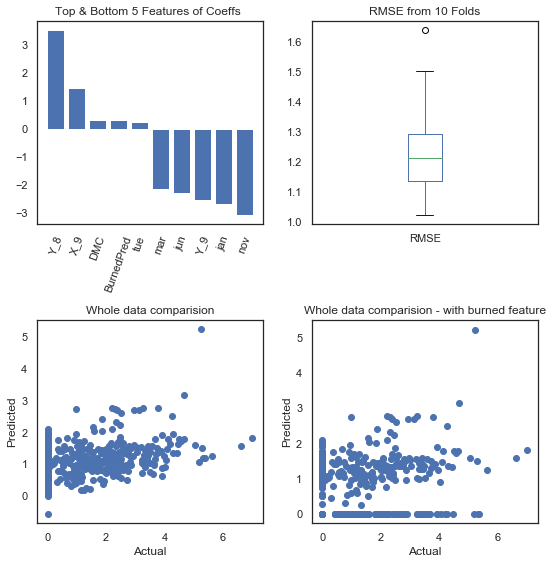

In [217]:
## Validating Linear model
Validations(model,Encod_ncols,Standarized_Data, 1 )

### Lasso

- Applying with L1 Norm Regulizer

In [186]:
## Hyper parameter selection Lasso
LS_grid_result=param_selection(linear_model.Lasso(),{'alpha':[0.00001, 0.0001, 0.001,0.01],'normalize':[False]}, Standarized_Data[Encod_ncols], Standarized_Data["area"],10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.01, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.3s finished


In [187]:
LS_grid_result.best_estimator_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.45533237 1.34848626 1.00910122 1.19475157 2.53673697 1.27473828
 1.06333809 1.52708677 1.4125338  1.71347924]
Cross Validation RMSE Mean Score 1.4535584556412882
Cross Validation RMSE Mean Score Orginial Burned Area Value 3.2783116421796823
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4709251251257196
RMSE of Orginal Area : 3.353260589504048
 
R2 Score 0.07399285017243318


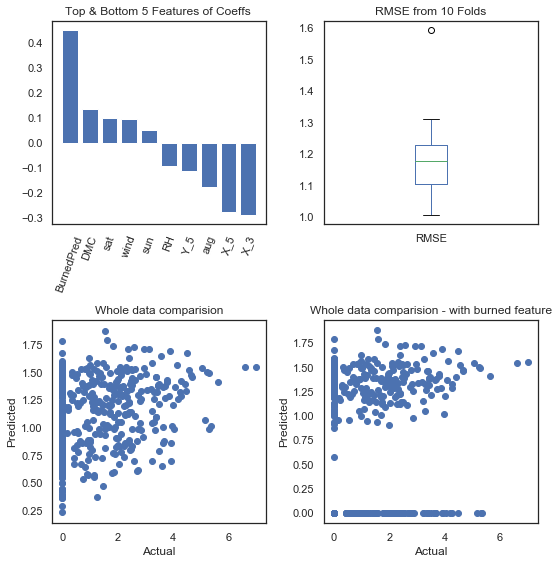

In [219]:
## Reproducing the best paramters and validation
LS_cust=linear_model.Lasso(alpha=.01,   normalize=False)
LS_cust.fit(Standarized_Data[Encod_ncols], Standarized_Data["area"])
Validations(LS_cust,Encod_ncols,Standarized_Data,1 )

In [191]:
print("Out of "+str(len(LS_cust.coef_))+" Features, "+str(len(list(filter(lambda x: x == 0, list(LS_cust.coef_)) )))+" are became 0 as part of lasso regularization")

Out of 42 Features, 22 are became 0 as part of lasso regularization


- Slightly `RMSE` score is decreased in Lasso regularization when comparing with out regularizer. 
- with `BurnedPred` feature punishment, RMSE is increased
- However, it cuts the **22 features**. So moving to Ridge to reduce weight instead of making it zero.

### Ridge

In [192]:
RD_grid_result=param_selection(linear_model.Ridge(),{'alpha':[0.00001, 0.0001, 0.001,0.01],'normalize':[False]}, Standarized_Data[Encod_ncols], Standarized_Data["area"],10)
RD_grid_result.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 1e-05, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.69031053 1.47693597 1.04569681 1.24693067 2.67818781 1.41137127
 1.07909334 1.60568187 1.46866997 2.25097268]
Cross Validation RMSE Mean Score 1.5953850919700545
Cross Validation RMSE Mean Score Orginial Burned Area Value 3.9302272975428103
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.440558487169375
RMSE of Orginal Area : 3.223053679812959
 
R2 Score 0.137141960207236


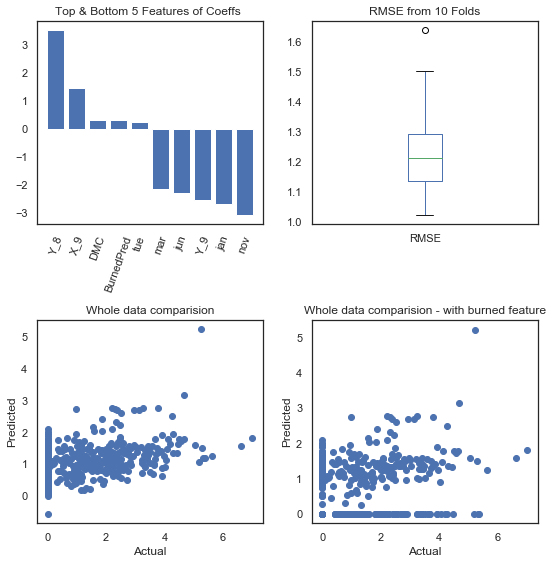

In [221]:
Validations(RD_grid_result.best_estimator_,Encod_ncols,Standarized_Data, 1 )

- Surprisingly, RMSE value increases with L2 Norm

### SVM

In [194]:
SVR_param_grid = {'C': [0.001,  0.1, 1, 10,100,150,200,300,500], 'gamma' : [0.0001,0.001, 0.01, 0.1, 1,10,100], 
                  'kernel':['rbf','poly','linear'],'epsilon': [ 0.001, 0.01, 0.1,1, 10]}
SVR_grid_result=param_selection(SVR(),SVR_param_grid, Standarized_Data[Encod_ncols], Standarized_Data["area"],10)

Fitting 10 folds for each of 315 candidates, totalling 3150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 0.1, 'epsilon': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done 3150 out of 3150 | elapsed:  2.2min finished


In [195]:
SVR_grid_result.best_estimator_

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.0002968  1.000012   0.84156103 1.05230311 2.49037953 1.20852287
 1.07350511 1.55640637 1.41521287 1.61516642]
Cross Validation RMSE Mean Score 1.325336611070616
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.763451961405022
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.503896171373771
RMSE of Orginal Area : 3.499184559580227
 
R2 Score -0.0062523409847790035


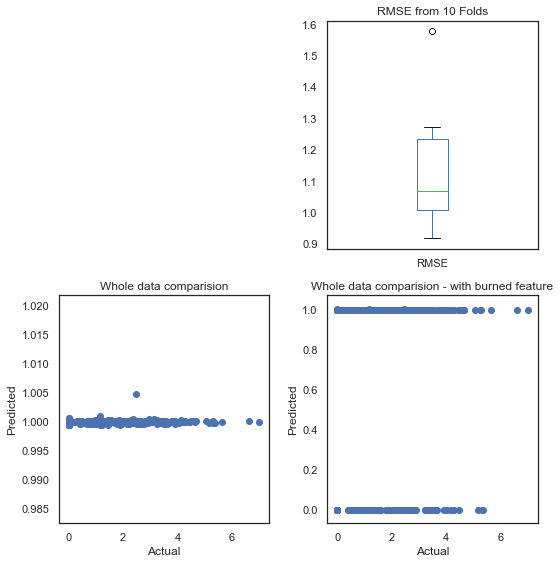

In [222]:
Validations(SVR_grid_result.best_estimator_ ,Encod_ncols,Standarized_Data, 0)

#### SVM Parameter tunning result

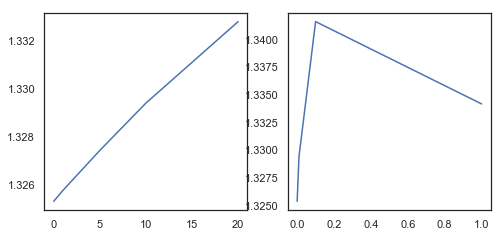

In [209]:
plt.subplots(figsize=(8,8))

plt.subplot(2,2,1)
c=[0.0001,0.001, 0.01, 0.1, 1, 5,10,20]
val=[]
for cs in c:
    SVR_exp=SVR(C=cs,epsilon=1, gamma=0.0001,  kernel='rbf')
    scores = cross_val_score(SVR_exp, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(c,val);

g=[0.0001,0.001, 0.01, 0.1, 1]
val=[]
for cs in g:
    SVR_exp=SVR(C=0.1,epsilon=1, gamma=cs, kernel='rbf')
    scores = cross_val_score(SVR_exp, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
    
plt.subplot(2,2,2)
plt.plot(g,val);

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.5425391  1.53944235 1.28352429 0.74680967 2.34792096 1.23896859
 1.14797723 1.49475405 1.45833529 1.52828934]
Cross Validation RMSE Mean Score 1.432856088721569
Cross Validation RMSE Mean Score Orginial Burned Area Value 3.1906509871253945
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.2089892711500938
RMSE of Orginal Area : 2.3500969012003896
 
R2 Score 0.5911424438321125


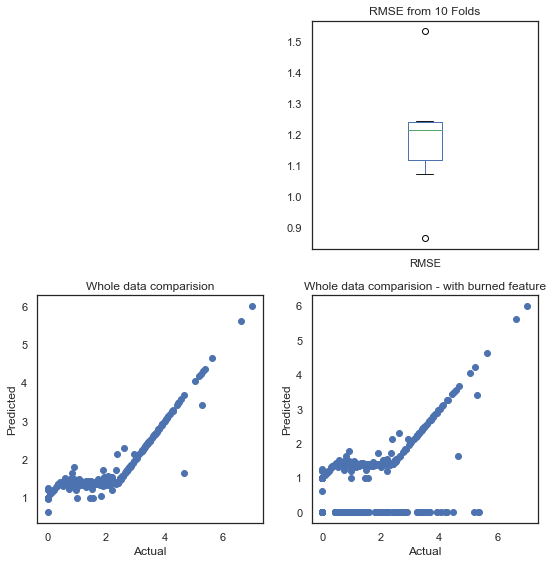

In [223]:
##gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’
SVR_Cust=SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVR_Cust.fit(Standarized_Data[Encod_ncols], Standarized_Data["area"])
Validations(SVR_Cust,Encod_ncols,Standarized_Data,0 )

- The GridCV suggested parameters gives the good `RMSE` is than Linear model result. But predicted values are skewed around 1.
- So we changed the `c` and `gamma` value. it slightly increases the RMSE (similar to Linear) but predicted and actual values are having a good correlation (`R2 Score`)

### Decision Tree

In [225]:
#max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
#min_samples_split : The minimum number of samples required to split an internal node
#min_samples_leaf  : The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
#max_leaf_nodes : Grow a tree with max_leaf_nodes in best-first fashion

DT_param_grid = {'criterion': ['mse', 'mae'],'max_depth': range(1,10,2),'min_samples_split': range(2,10,2) ,'min_samples_leaf': [20, 40, 80,100], 'max_leaf_nodes': [5, 20, 100]}
DT_grid_result=param_selection(tree.DecisionTreeRegressor(),DT_param_grid, Standarized_Data[Encod_ncols], Standarized_Data["area"],10)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'criterion': 'mse', 'max_depth': 1, 'max_leaf_nodes': 100, 'min_samples_leaf': 100, 'min_samples_split': 8}


[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed:   48.4s finished


In [226]:
DT_grid_result.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=100, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.27734342 1.10909618 0.88096489 1.09200667 2.60621226 1.18170151
 1.06956783 1.51151868 1.35785215 1.65351133]
Cross Validation RMSE Mean Score 1.3739774921287746
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.95103469269612
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.472506147519681
RMSE of Orginal Area : 3.360148635625589
 
R2 Score 0.057378025422950785


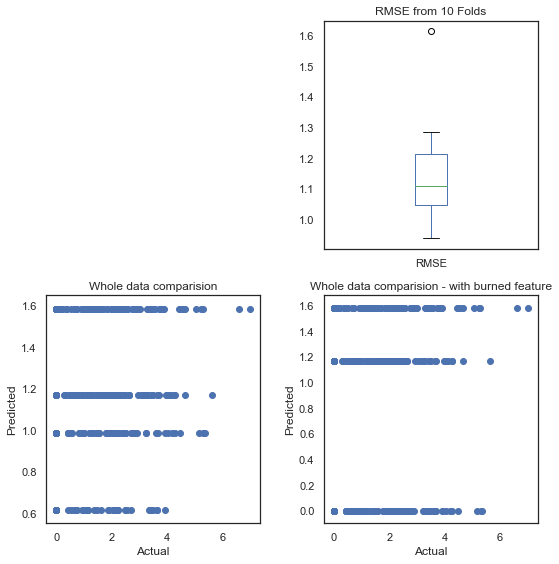

In [227]:
# Validations(DT_grid_result.best_estimator_ ,ncols,Standarized_Data2, X_train, X_test, y_train, y_test )
Validations(DT_grid_result.best_estimator_,Encod_ncols,Standarized_Data )

{'criterion': 'mse', 'max_depth': 1, 'max_leaf_nodes': 100, 'min_samples_leaf': 100, 'min_samples_split': 8}


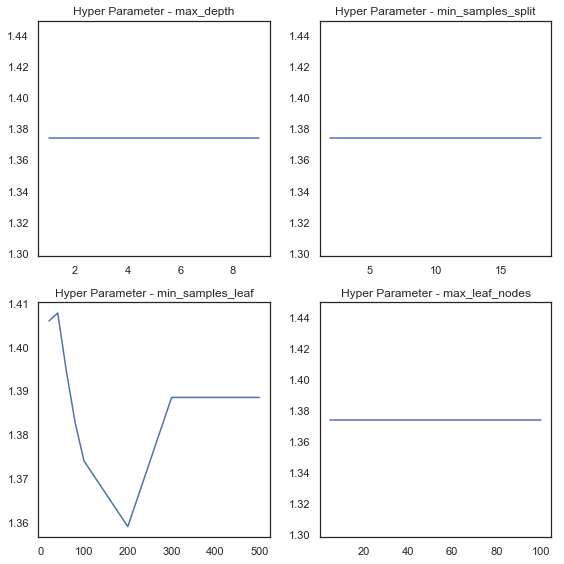

In [228]:
# {'criterion': 'mse', 'max_depth': 1, 'max_leaf_nodes': 8, 'min_samples_leaf': 100, 'min_samples_split': 8}
DT_params=DT_grid_result.best_params_
print(DT_params)
plt.subplots(figsize=(8,8))

plt.subplot(2,2,1)
params= range(1,10,2)
val=[]
for x in params:  
    model=tree.DecisionTreeRegressor(criterion='mse', max_depth=x,min_samples_split=DT_params["min_samples_split"],max_leaf_nodes=DT_params['max_leaf_nodes'],  min_samples_leaf=DT_params['min_samples_leaf'])
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - max_depth');

plt.subplot(2,2,2)
params= range(2,20,2)
val=[]
for x in params:  
    model=tree.DecisionTreeRegressor(criterion='mse', max_depth=DT_params['max_depth'],min_samples_split=x,max_leaf_nodes=DT_params['max_leaf_nodes'],  min_samples_leaf=DT_params['min_samples_leaf'])
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - min_samples_split');

plt.subplot(2,2,3)
params= [20,40,60,80,100,200,300,400,500]
val=[]
for x in params:  
    model=tree.DecisionTreeRegressor(criterion='mse', max_depth=DT_params['max_depth'], min_samples_split=DT_params["min_samples_split"],max_leaf_nodes=DT_params['max_leaf_nodes'],  min_samples_leaf=x)
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - min_samples_leaf');

plt.subplot(2,2,4)
params= [5,20,40,60,80,100]
val=[]
for x in params:  
    model=tree.DecisionTreeRegressor(criterion='mse', max_depth=DT_params['max_depth'], min_samples_split=DT_params["min_samples_split"],max_leaf_nodes=x,  min_samples_leaf=DT_params['min_samples_leaf'])
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - max_leaf_nodes');


plt.tight_layout()



 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.24668627 1.11764563 0.93377285 1.07719332 2.50465086 1.13838531
 1.09655883 1.51801478 1.36444925 1.59235269]
Cross Validation RMSE Mean Score 1.3589709798478526
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.892186102469032
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4802923055471502
RMSE of Orginal Area : 3.394229951000109
 
R2 Score 0.03746038049392153


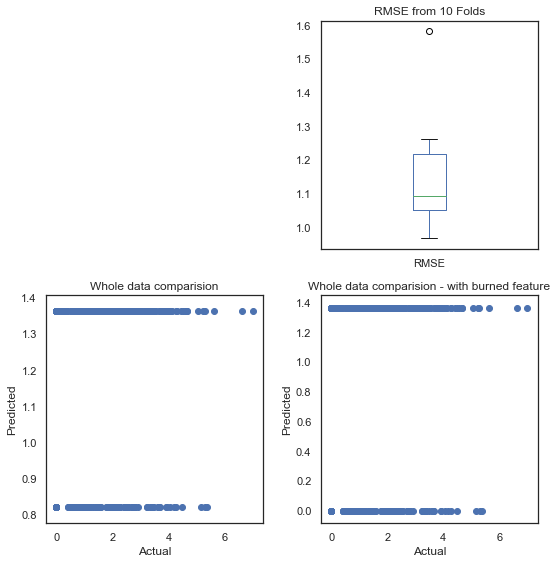

In [230]:
## Changing the max depth of tree. it gives a better result.
DT_Cust=tree.DecisionTreeRegressor(criterion='mse',max_depth=1, min_samples_split=100,max_leaf_nodes=5,  min_samples_leaf=200)
DT_Cust.fit( Standarized_Data[Encod_ncols], Standarized_Data['area'])
Validations(DT_Cust,Encod_ncols,Standarized_Data)

- The GridCV best estimator gives the RMSE whic is similiar to the linear models. But R2 Score is very low.
- `min_sample_leaf` parameter changes have slightly effect with RMSE result. The suggested parameter is 100, but it is going down little bit with parameter 200. That is meant to be *if minimum number of nodes in leaf node is 200 than model is optimal RMSE accuracy*. However it also didn't make much difference with R2 score. 

### Random Forest

In [232]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 30, num = 3)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,10,20,40,80,100]

# Create the random grid
RF_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

RF_grid_result=param_selection(RandomForestRegressor(),RF_param_grid,Standarized_Data[Encod_ncols], Standarized_Data["area"],5)
RF_grid_result.best_estimator_

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'min_samples_split': 20, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 5400 out of 5400 | elapsed: 51.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.23591672 1.21799243 1.01563959 1.05118429 2.54739251 1.19930194
 1.05856012 1.53511472 1.40870221 1.60158087]
Cross Validation RMSE Mean Score 1.3871385394129914
Cross Validation RMSE Mean Score Orginial Burned Area Value 3.0033781388475305
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4855581548997716
RMSE of Orginal Area : 3.417430335196312
 
R2 Score 0.01996711560323494


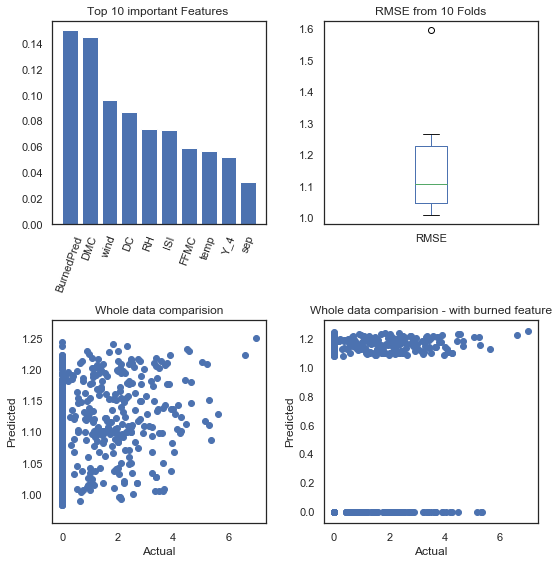

In [234]:
# Validations(RF_grid_result.best_estimator_,Encod_ncols,Standarized_Data, X_train, X_test, y_train, y_test,2 )
RDF_Cust=RandomForestRegressor(criterion='mse', max_depth=30,max_features='sqrt',
                      min_samples_leaf=100, min_samples_split=20,
                      n_estimators=100)
RDF_Cust.fit(Standarized_Data[Encod_ncols], Standarized_Data["area"])
Validations(RDF_Cust,Encod_ncols,Standarized_Data,2 )

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'min_samples_split': 20, 'n_estimators': 100}


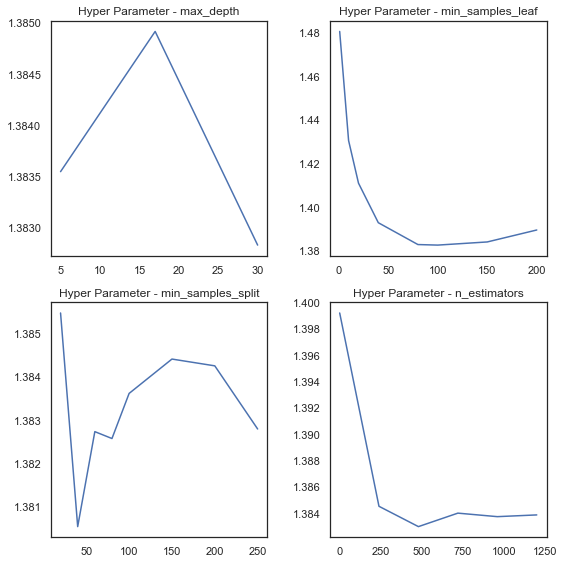

In [238]:
# RT_params= {'max_depth': 17, 'max_features': 'auto', 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 100}

plt.subplots(figsize=(8,8))

RT_params=RF_grid_result.best_params_
print(RT_params)

plt.subplot(2,2,1)
params= [int(x) for x in np.linspace(5, 30, num = 3)]
val=[]
for x in params:  
    model=RandomForestRegressor(criterion='mse', max_depth=x,max_features='sqrt',
                      min_samples_leaf=RT_params['min_samples_leaf'], min_samples_split=RT_params['min_samples_split'],
                      n_estimators=RT_params['n_estimators'])
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - max_depth');

plt.subplot(2,2,2)
params= [1,10,20,40,80,100,150,200]
val=[]
for x in params:  
    model=RandomForestRegressor(criterion='mse', max_depth=RT_params['max_depth'],max_features='sqrt',
                      min_samples_leaf=x, min_samples_split=RT_params['min_samples_split'],
                      n_estimators=RT_params['n_estimators'])
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - min_samples_leaf');

plt.subplot(2,2,3)
params= [20,40,60,80,100,150,200,250]
val=[]
for x in params:  
    model=RandomForestRegressor(criterion='mse', max_depth=RT_params['max_depth'],max_features='sqrt',
                      min_samples_leaf=RT_params['min_samples_leaf'], min_samples_split=x,
                      n_estimators=RT_params['n_estimators'])
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - min_samples_split');

plt.subplot(2,2,4)
params= [int(x) for x in np.linspace(start = 1, stop = 1200, num = 6)]
val=[]
for x in params:  
    model=RandomForestRegressor(criterion='mse', max_depth=RT_params['max_depth'],max_features='sqrt',
                      min_samples_leaf=RT_params['min_samples_leaf'], min_samples_split=RT_params['min_samples_split'],
                      n_estimators=x)
    scores = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], cv=10, scoring="neg_mean_squared_error")
    val.append(np.mean(np.sqrt(abs(scores))))
plt.plot(params,val);
plt.title('Hyper Parameter - n_estimators');

plt.tight_layout()

 
10 Fold validation :
_______________________________
Cross Validation RMSE Scores [1.23895256 1.21082986 1.01725227 1.03492302 2.53389488 1.19823262
 1.0592381  1.53457261 1.4024699  1.60034973]
Cross Validation RMSE Mean Score 1.3830715544969459
Cross Validation RMSE Mean Score Orginial Burned Area Value 2.987129524175497
 
With effect of Burned Categorical Feature  
_______________________________
RMSE of Log Transformed Area : 1.4860279218906784
RMSE of Orginal Area : 3.4195059856502805
 
R2 Score 0.020037473227894287


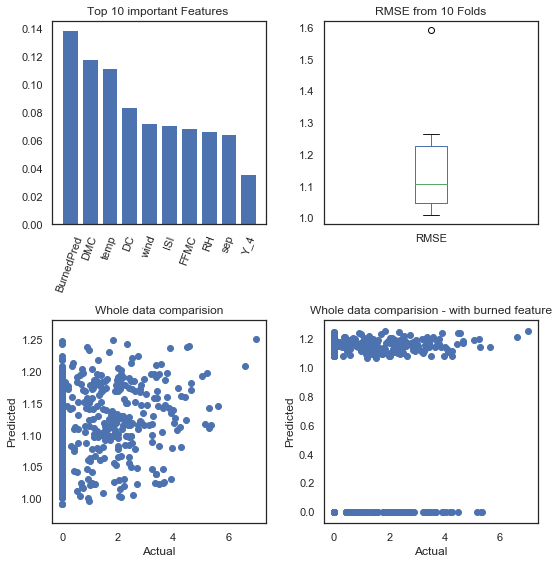

In [239]:
RDF_Cust=RandomForestRegressor(criterion='mse', max_depth=RT_params['max_depth'],max_features='sqrt',
                      min_samples_leaf=RT_params['min_samples_leaf'], min_samples_split=40,
                      n_estimators=500)
RDF_Cust.fit( Standarized_Data[Encod_ncols], Standarized_Data['area'])
Validations(RDF_Cust,Encod_ncols,Standarized_Data, 2 )

- The best_param model RMSE values is similiar to the other models.
- Parameter tunning is provides the range of different RMSE scores [1.38 to 1.48].

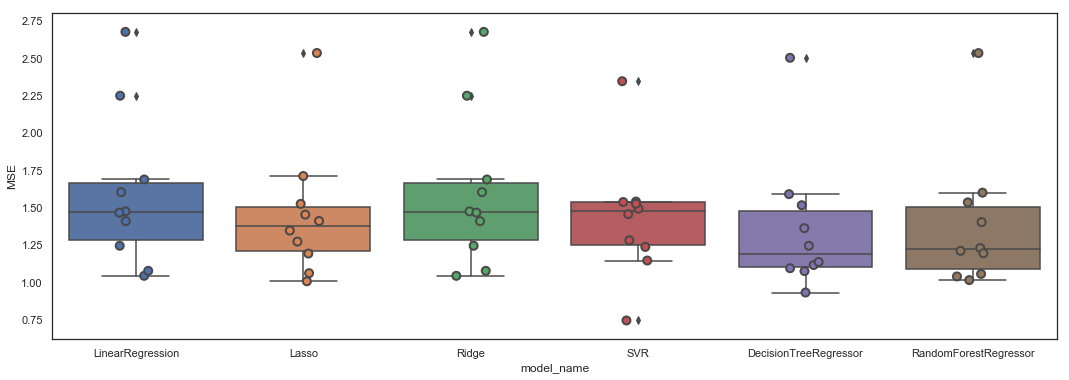

model_name
DecisionTreeRegressor    1.358971
Lasso                    1.453558
LinearRegression         1.595386
RandomForestRegressor    1.383862
Ridge                    1.595385
SVR                      1.432856
Name: MSE, dtype: float64

In [242]:
## All model comparision 

models = [
    LinearRegression(fit_intercept=True, n_jobs=None,normalize=False),
    linear_model.Lasso(alpha=.01,   normalize=False),
    linear_model.Ridge(alpha=1e-05, normalize=False),
    SVR(C=5, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=1,  kernel='rbf', tol=0.001),
    tree.DecisionTreeRegressor(criterion='mse',max_depth=1, min_samples_split=100,max_leaf_nodes=5,  min_samples_leaf=200),
    RandomForestRegressor(criterion='mse', max_depth=RT_params['max_depth'],max_features='sqrt',
                      min_samples_leaf=RT_params['min_samples_leaf'], min_samples_split=40,
                      n_estimators=500)  
]

CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, Standarized_Data[Encod_ncols], Standarized_Data['area'], scoring='neg_mean_squared_error', cv=CV)
    accuracies=np.sqrt(np.abs(accuracies))
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

fig, ax = plt.subplots(figsize=(18,6))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'MSE'])
sns.boxplot(x='model_name', y='MSE', data=cv_df)
sns.stripplot(x='model_name', y='MSE', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').MSE.mean()


Over all **Decision Tree** is giving best results. But when we add `r2_score` metric **SVR** better. Also `BurnedPred` Feature can act as supplementary but could not take a decision alone. 